<a href="https://colab.research.google.com/github/Gopal4651/LoanDefaultPrediction/blob/main/LoanDefaultPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
df = pd.read_csv('/content/LoanDataset - LoansDatasest.csv')

In [3]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [4]:
df.tail()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,NaN,30,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,NaN,19,NO DEFAULT
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5,N,28,DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,NaN,26,NO DEFAULT
32585,32581.0,99,42000,RENT,2.0,MEDICAL,B,"£6,475.00",9.99,6,NaN,30,NO DEFAULT


In [5]:
df.dtypes

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [6]:
df.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [8]:
df.isnull().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [9]:
df.dropna(subset=['customer_id'], inplace=True)

In [10]:
df.isnull().sum()

customer_id                0
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3115
term_years                 0
historical_default     20735
cred_hist_length           0
Current_loan_status        4
dtype: int64

<Axes: >

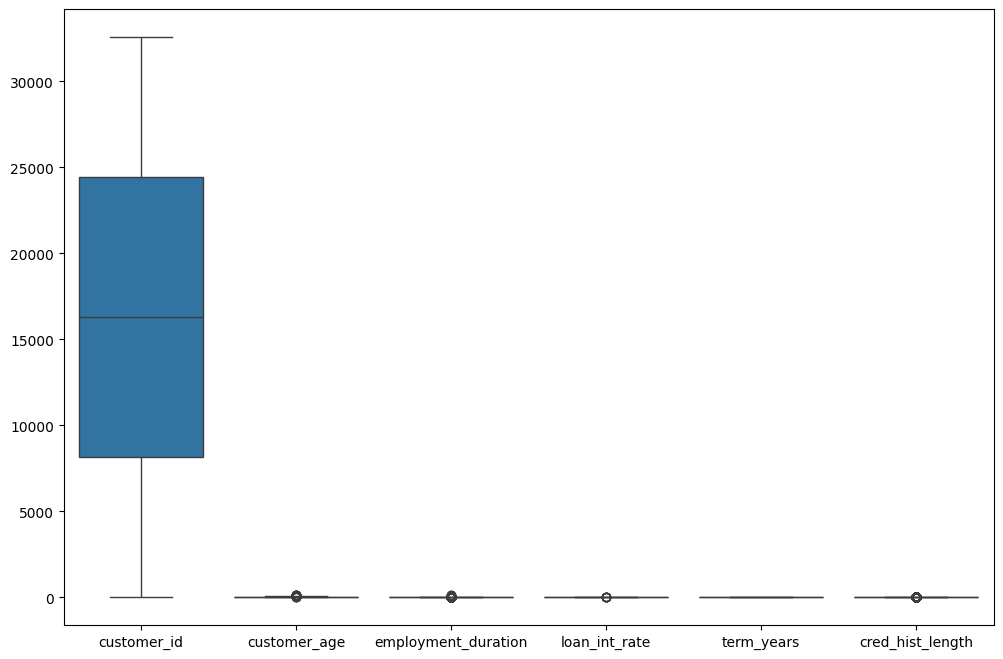

In [11]:
## checking outliers
plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [12]:
##fill null values
df['employment_duration'] = df['employment_duration'].fillna(df['employment_duration'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [13]:
df['employment_duration'].median()
df['loan_int_rate'].median()

10.99

In [14]:
## filling null values of object
df['loan_amnt'] = df['loan_amnt'].fillna(df['loan_amnt'].mode()[0])
df['historical_default'] = df['historical_default'].fillna(df['historical_default'].mode()[0])
df['Current_loan_status'] = df['Current_loan_status'].fillna(df['Current_loan_status'].mode()[0])

In [15]:
df['loan_amnt'].mode()[0]

'£10,000.00'

In [16]:
df.isnull().sum()

customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64

Number of people who took loan by home ownership
home_ownership
RENT        16450
MORTGAGE    13442
OWN          2584
OTHER         107
Name: count, dtype: int64


<Axes: xlabel='home_ownership', ylabel='count'>

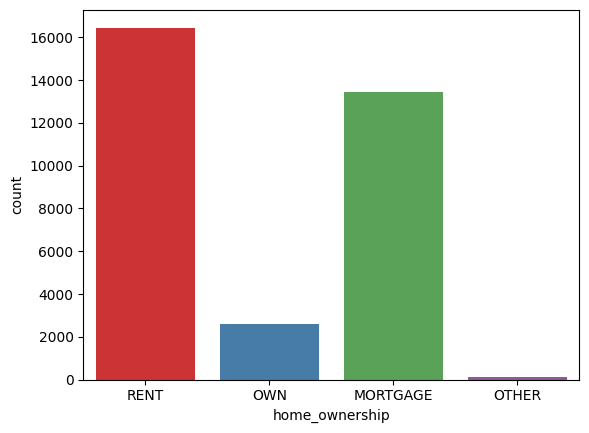

In [17]:
print('Number of people who took loan by home ownership')
print(df['home_ownership'].value_counts())
sns.countplot(x='home_ownership', data = df, palette='Set1')

Number of people who took because of
loan_intent
EDUCATION            6454
MEDICAL              6072
VENTURE              5718
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3606
Name: count, dtype: int64


<Axes: xlabel='loan_intent', ylabel='count'>

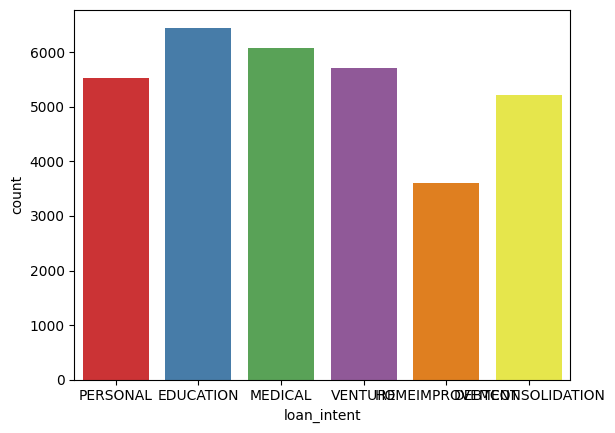

In [18]:
print('Number of people who took because of')
print(df['loan_intent'].value_counts())
sns.countplot(x='loan_intent', data = df, palette='Set1')

<Axes: >

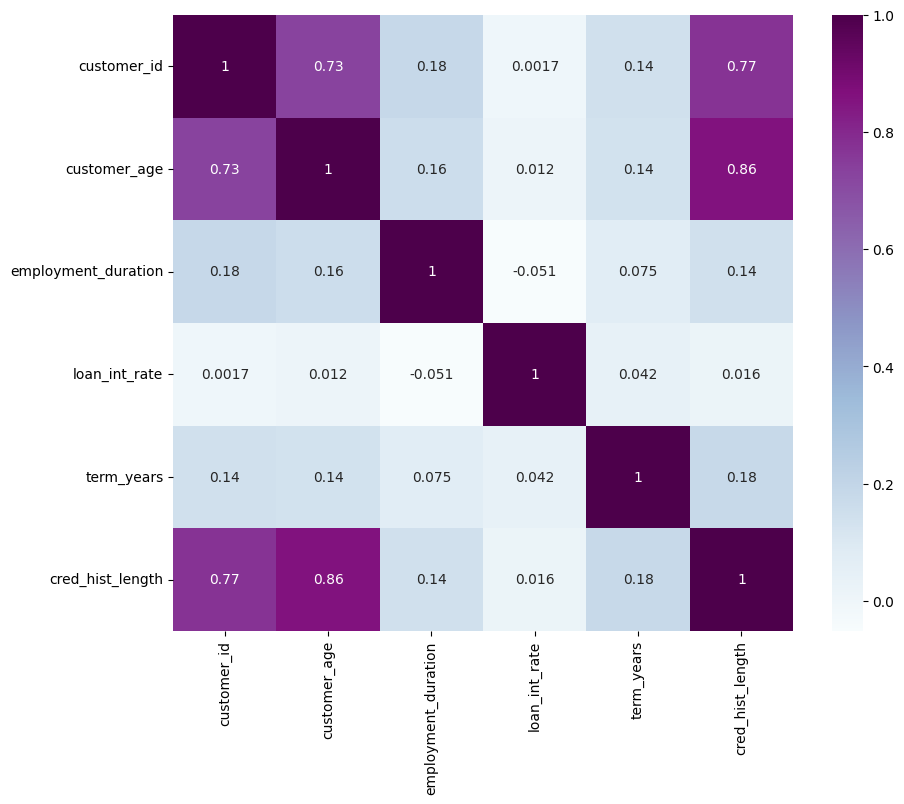

In [19]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot =True, cmap ='BuPu')

In [20]:
##Apply log transformation
df['customer_income'] = df['customer_income'].str.replace('£', '').str.replace(',', '').astype(float)

# Perform log transformation
df['customer_income_log'] = np.log1p(df['customer_income'])

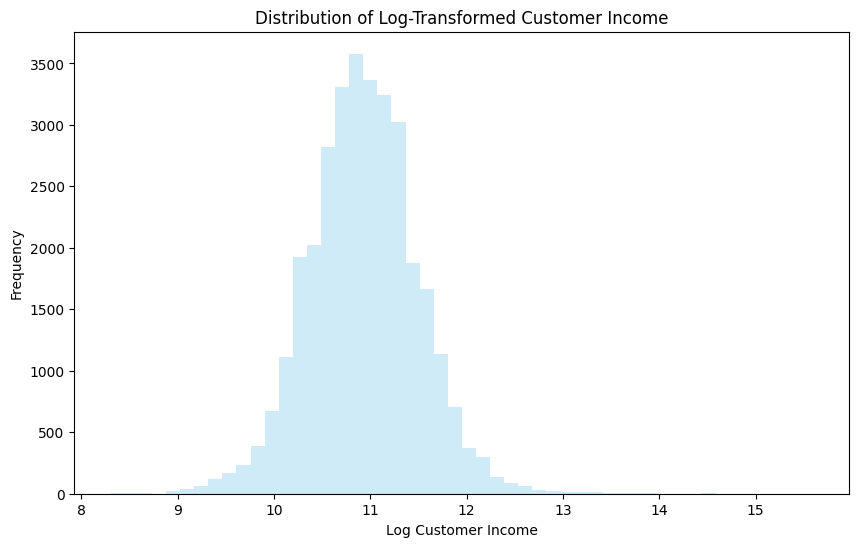

In [21]:
plt.figure(figsize=(10, 6))
sns.distplot(df['customer_income_log'], bins=50, kde=False, color='skyblue')
plt.title('Distribution of Log-Transformed Customer Income')
plt.xlabel('Log Customer Income')
plt.ylabel('Frequency')
plt.show()

In [22]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT,10.985310
1,2.0,21,9600.0,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,Y,2,NO DEFAULT,9.169623
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT,9.169623
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT,11.089821
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT,10.904138


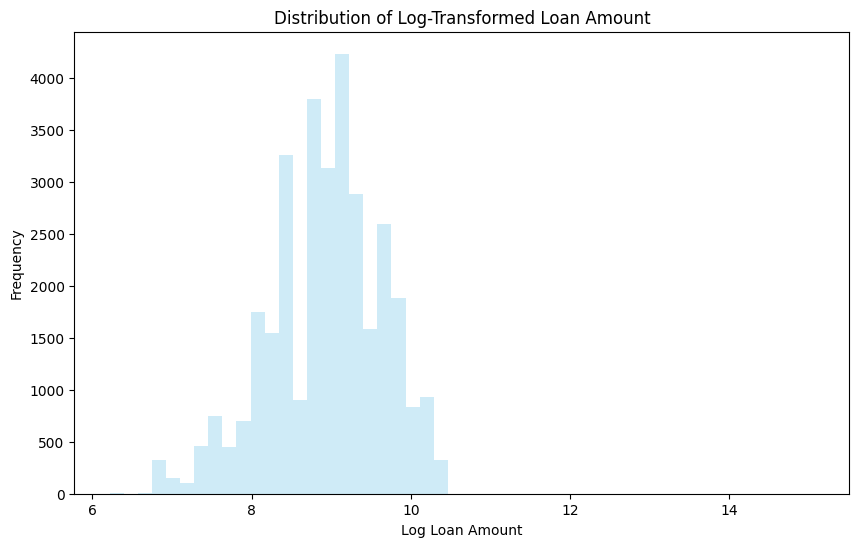

In [23]:
df['loan_amnt'] = df['loan_amnt'].str.replace('£', '').str.replace(',', '').astype(float)

# Perform log transformation
df['loan_amnt_log'] = np.log1p(df['loan_amnt'])

plt.figure(figsize=(10, 6))
sns.distplot(df['loan_amnt_log'], bins=50, kde=False, color='skyblue')
plt.title('Distribution of Log-Transformed Loan Amount')
plt.xlabel('Log Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [24]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log,loan_amnt_log
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT,10.985310,10.463132
1,2.0,21,9600.0,OWN,5.0,EDUCATION,A,1000.0,11.14,1,Y,2,NO DEFAULT,9.169623,6.908755
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT,9.169623,8.612685
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT,11.089821,10.463132
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT,10.904138,10.463132


In [25]:
df.tail()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log,loan_amnt_log
32581,32577.0,57,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,7,Y,30,NO DEFAULT,10.878066,8.665786
32582,32578.0,54,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,4,Y,19,NO DEFAULT,11.695255,9.777130
32583,32579.0,65,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000.0,10.99,5,N,28,DEFAULT,11.238502,10.463132
32584,32580.0,56,150000.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,6,Y,26,NO DEFAULT,11.918397,9.615872
32585,32581.0,99,42000.0,RENT,2.0,MEDICAL,B,6475.0,9.99,6,Y,30,NO DEFAULT,10.645449,8.775858


In [26]:
# drop unnecessary columns
cols = ['customer_income', 'loan_amnt']
df = df.drop(columns = cols, axis = 1)
df.head()

,customer_id,customer_age,home_ownership,employment_duration,loan_intent,loan_grade,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log,loan_amnt_log
0,1.0,22,RENT,123.0,PERSONAL,C,16.02,10,Y,3,DEFAULT,10.985310,10.463132
1,2.0,21,OWN,5.0,EDUCATION,A,11.14,1,Y,2,NO DEFAULT,9.169623,6.908755
2,3.0,25,MORTGAGE,1.0,MEDICAL,B,12.87,5,N,3,DEFAULT,9.169623,8.612685
3,4.0,23,RENT,4.0,MEDICAL,B,15.23,10,N,2,DEFAULT,11.089821,10.463132
4,5.0,24,RENT,8.0,MEDICAL,B,14.27,10,Y,4,DEFAULT,10.904138,10.463132


In [27]:
# Encoding technique :  label encoding, one hot encoding

from sklearn.preprocessing import LabelEncoder
cols = ['historical_default', 'Current_loan_status']
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

In [28]:
df.head()

,customer_id,customer_age,home_ownership,employment_duration,loan_intent,loan_grade,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log,loan_amnt_log
0,1.0,22,RENT,123.0,PERSONAL,C,16.02,10,1,3,0,10.985310,10.463132
1,2.0,21,OWN,5.0,EDUCATION,A,11.14,1,1,2,1,9.169623,6.908755
2,3.0,25,MORTGAGE,1.0,MEDICAL,B,12.87,5,0,3,0,9.169623,8.612685
3,4.0,23,RENT,4.0,MEDICAL,B,15.23,10,0,2,0,11.089821,10.463132
4,5.0,24,RENT,8.0,MEDICAL,B,14.27,10,1,4,0,10.904138,10.463132


In [29]:
df.dtypes

customer_id            float64
customer_age             int64
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_int_rate          float64
term_years               int64
historical_default       int64
cred_hist_length         int64
Current_loan_status      int64
customer_income_log    float64
loan_amnt_log          float64
dtype: object

In [30]:
df = pd.get_dummies(df, columns=['home_ownership', 'loan_intent', 'loan_grade'])

In [31]:
for col in ['home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
           'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
           'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
           'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E']:
    df[col] = df[col].astype(int)

In [32]:
df.head()

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log,loan_amnt_log,...,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E
0,1.0,22,123.0,16.02,10,1,3,0,10.985310,10.463132,...,0,0,0,1,0,0,0,1,0,0
1,2.0,21,5.0,11.14,1,1,2,1,9.169623,6.908755,...,1,0,0,0,0,1,0,0,0,0
2,3.0,25,1.0,12.87,5,0,3,0,9.169623,8.612685,...,0,0,1,0,0,0,1,0,0,0
3,4.0,23,4.0,15.23,10,0,2,0,11.089821,10.463132,...,0,0,1,0,0,0,1,0,0,0
4,5.0,24,8.0,14.27,10,1,4,0,10.904138,10.463132,...,0,0,1,0,0,0,1,0,0,0


In [33]:
df.dtypes

customer_id                      float64
customer_age                       int64
employment_duration              float64
loan_int_rate                    float64
term_years                         int64
historical_default                 int64
cred_hist_length                   int64
Current_loan_status                int64
customer_income_log              float64
loan_amnt_log                    float64
home_ownership_MORTGAGE            int64
home_ownership_OTHER                bool
home_ownership_OWN                 int64
home_ownership_RENT                int64
loan_intent_DEBTCONSOLIDATION      int64
loan_intent_EDUCATION              int64
loan_intent_HOMEIMPROVEMENT        int64
loan_intent_MEDICAL                int64
loan_intent_PERSONAL               int64
loan_intent_VENTURE                int64
loan_grade_A                       int64
loan_grade_B                       int64
loan_grade_C                       int64
loan_grade_D                       int64
loan_grade_E    

In [34]:
## Split independent and dependent features

X = df.drop(columns = ['Current_loan_status'], axis = 1)
Y = df['Current_loan_status']

In [35]:
X

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,historical_default,cred_hist_length,customer_income_log,loan_amnt_log,home_ownership_MORTGAGE,...,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E
0,1.0,22,123.0,16.02,10,1,3,10.985310,10.463132,0,...,0,0,0,1,0,0,0,1,0,0
1,2.0,21,5.0,11.14,1,1,2,9.169623,6.908755,0,...,1,0,0,0,0,1,0,0,0,0
2,3.0,25,1.0,12.87,5,0,3,9.169623,8.612685,1,...,0,0,1,0,0,0,1,0,0,0
3,4.0,23,4.0,15.23,10,0,2,11.089821,10.463132,0,...,0,0,1,0,0,0,1,0,0,0
4,5.0,24,8.0,14.27,10,1,4,10.904138,10.463132,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,1.0,13.16,7,1,30,10.878066,8.665786,1,...,0,0,0,1,0,0,0,1,0,0
32582,32578.0,54,4.0,7.49,4,1,19,11.695255,9.777130,1,...,0,0,0,1,0,1,0,0,0,0
32583,32579.0,65,3.0,10.99,5,0,28,11.238502,10.463132,0,...,0,1,0,0,0,0,1,0,0,0
32584,32580.0,56,5.0,11.48,6,1,26,11.918397,9.615872,1,...,0,0,0,1,0,0,1,0,0,0


In [36]:
Y

0        0
1        1
2        0
3        0
4        0
        ..
32581    1
32582    1
32583    0
32584    1
32585    1
Name: Current_loan_status, Length: 32583, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [39]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_model1)

In [40]:
accuracy*100

87.95727964645225

In [41]:
# Accurcy : the ratio of the correctly predicted values to the total values

In [42]:
score = cross_val_score(model1, X, Y, cv = 5)
score

array([0.88660427, 0.87586313, 0.84225871, 0.83563536, 0.64656231])

In [43]:
np.mean(score)*100

81.73847536494485

In [44]:
# Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)
Y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(Y_pred_model2, Y_test)
print("Accuracy score of Decision Tree model: ", accuracy*100)

Accuracy score of Decision Tree model:  94.97913086177266


In [45]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train, Y_train)
Y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(Y_pred_model3, Y_test)
print("Accuracy score of Random Forest model: ", accuracy*100)

Accuracy score of Random Forest model:  96.75914559292904


In [46]:
## KNeighbour model
model4 = KNeighborsClassifier(n_neighbors=7)
model4.fit(X_train, Y_train)
Y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(Y_pred_model4, Y_test)
print("Accuracy score of KNeighborsClassifier model: ", accuracy*100)

Accuracy score of KNeighborsClassifier model:  79.73238399214338


In [47]:
from sklearn.metrics import classification_report

def generate_classfication_report(model_name, Y_test, Y_pred):
  report = classification_report(Y_test, Y_pred)
  print(f"Classification report for {model_name}:\n{report}\n")

generate_classfication_report(model1, Y_test, Y_pred_model1)
generate_classfication_report(model2, Y_test, Y_pred_model2)
generate_classfication_report(model3, Y_test, Y_pred_model3)
generate_classfication_report(model4, Y_test, Y_pred_model4)

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.81      0.56      0.66      1717
           1       0.89      0.97      0.93      6429

    accuracy                           0.88      8146
   macro avg       0.85      0.76      0.79      8146
weighted avg       0.87      0.88      0.87      8146


Classification report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1717
           1       0.97      0.97      0.97      6429

    accuracy                           0.95      8146
   macro avg       0.92      0.92      0.92      8146
weighted avg       0.95      0.95      0.95      8146


Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1717
           1       0.97      0.99      0.98      6429

    accuracy                

In [48]:
df['Current_loan_status'].value_counts()

Current_loan_status
1    25744
0     6839
Name: count, dtype: int64

In [49]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [50]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
oversample = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversample.fit_resample(X, Y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns = X.columns), pd.Series(Y_resampled, name="Current_loan_status")], axis = 1)

In [52]:
X_resampled

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,historical_default,cred_hist_length,customer_income_log,loan_amnt_log,home_ownership_MORTGAGE,...,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E
0,1.0,22,123.0,16.02,10,1,3,10.985310,10.463132,0,...,0,0,0,1,0,0,0,1,0,0
1,2.0,21,5.0,11.14,1,1,2,9.169623,6.908755,0,...,1,0,0,0,0,1,0,0,0,0
2,3.0,25,1.0,12.87,5,0,3,9.169623,8.612685,1,...,0,0,1,0,0,0,1,0,0,0
3,4.0,23,4.0,15.23,10,0,2,11.089821,10.463132,0,...,0,0,1,0,0,0,1,0,0,0
4,5.0,24,8.0,14.27,10,1,4,10.904138,10.463132,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51483,7937.0,21,2.0,11.46,1,0,2,10.692059,8.853808,0,...,0,1,0,0,0,1,0,0,0,0
51484,5369.0,21,5.0,11.49,1,0,2,10.691968,9.047939,0,...,0,0,0,0,0,1,0,0,0,0
51485,2509.0,22,1.0,11.86,2,0,2,9.798183,8.006701,0,...,0,0,0,1,0,0,1,0,0,0
51486,24315.0,28,0.0,10.99,8,0,9,9.392745,8.294300,0,...,0,0,1,0,0,0,1,0,0,0


In [53]:
Y_resampled

0        0
1        1
2        0
3        0
4        0
        ..
51483    0
51484    0
51485    0
51486    0
51487    0
Name: Current_loan_status, Length: 51488, dtype: int64

In [54]:
Y_resampled.value_counts()

Current_loan_status
0    25744
1    25744
Name: count, dtype: int64